# Decitabine and rg3039 treatment RNA-Seq experiments
Decitabine -> DNMT1 inhibitor 

rg3039 -> DCPS inhibitor

In [1]:
from venn import venn 
import sys
import pandas as pd 
from matplotlib.pyplot import subplots
from itertools import chain, product
from matplotlib_venn import venn2, venn2_circles
from matplotlib import pyplot as plt

sys.path.append('../../scripts/')

from util import *

In [7]:
# comb_vs_decitabine_up,comb_vs_decitabine_down = [
#     set(c.index.tolist()) for c in find_top(
#         pd.read_csv('comb_vs_decitabine_delta_exp_table.txt',sep='\t').set_index('gene_name')[['log2FoldChange','pvalue']],'log2FoldChange',5,'pvalue',0.01
#     )]

# comb_vs_dmso_up,comb_vs_dmso_down = [
#     set(c.index.tolist()) for c in find_top(
#         pd.read_csv('comb_vs_dmso_delta_exp_table.txt',sep='\t').set_index('gene_name')[['log2FoldChange','pvalue']],'log2FoldChange',5,'pvalue',0.01
#     )]

In [8]:
# _, (ax,bx) = subplots(ncols=2, nrows=1, figsize=(3, 3),dpi=300)

# venn(
#     {'comb_vs_decitabine_up':comb_vs_decitabine_up,
#      'comb_vs_dmso_up':comb_vs_dmso_up},
#      fontsize=4,legend_loc="upper left", 
#     ax=ax
# )
# venn(
#     {'comb_vs_decitabine_down':comb_vs_decitabine_down,
#      'comb_vs_decitabine_up':comb_vs_decitabine_down,
#      'comb_vs_dmso_down':comb_vs_dmso_down},
#      fontsize=4,legend_loc="upper left", ax=bx
# )

# plt.show()

In [9]:
# len(list(comb_vs_decitabine_up - comb_vs_dmso_up))

In [10]:
# genes = list(comb_vs_decitabine_up - comb_vs_dmso_up) + list(comb_vs_decitabine_down - comb_vs_dmso_down)

In [11]:
# genes

In [13]:
labels = [
'ADAM8','CCL3', 'CCR2', 'CD14', 'CD86', 'HLA-E', 'IL12B',
 'IL23A', 'LILRA2', 'LILRA5', 'MAPKAPK2', 'NOD2', 'ORM1',
 'ORM2', 'PTAFR', 'PTPRC', 'PTPRJ', 'THBS1', 'TLR4', 'TLR9', 'TYROBP'
]

## Load packages and functions

In [14]:
%load_ext rpy2.ipython

In [15]:
%%R 
suppressMessages(suppressWarnings(library (tidyverse)))
suppressMessages(suppressWarnings(library (ggplot2)))
suppressMessages(suppressWarnings(library (ggrepel)))
suppressMessages(suppressWarnings(library (patchwork)))
suppressMessages(suppressWarnings(library(gridExtra)))
library(grid)
library(ggthemes)

In [16]:
%%R 
ncu = read.table(
    'deseq2_norm.txt', sep="\t"
)

In [17]:
%%R 
result_table <- cbind(
    read.table('comb_vs_decitabine_delta_exp_table.txt',header=T) %>% 
        dplyr::select('gene_name','log2FoldChange','pvalue') %>% rename(comb_vs_dmso_log2FC=log2FoldChange,comb_vs_dmso_pvalue=pvalue),
    read.table('comb_vs_dmso_delta_exp_table.txt',header=T) %>% 
        dplyr::select('log2FoldChange','pvalue') %>% rename(comb_vs_decitabine_log2FC=log2FoldChange,comb_vs_decitabine_pvalue=pvalue)
) %>% drop_na() %>% dplyr::filter(
    (#abs(comb_vs_dmso_log2FC) > 2 & 
    comb_vs_dmso_pvalue < 0.01) | 
    (#abs(comb_vs_decitabine_log2FC) > 2 & 
    comb_vs_decitabine_pvalue < 0.01)
)

### Scatter plot

In [18]:
# RES$comb_vs_dmso$log2FoldChange
# RES$comb_vs_dmso$log2FoldChange

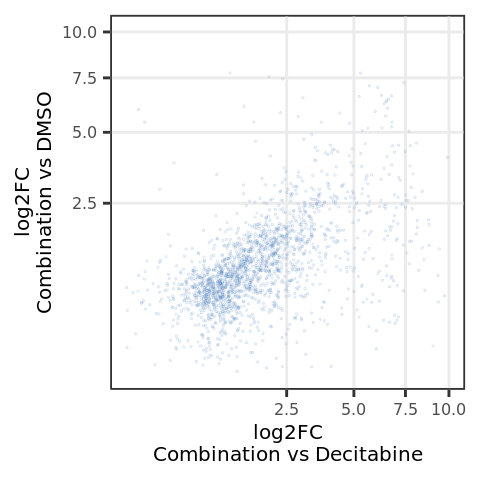

In [28]:
%%R -i labels

x_lab = 'comb_vs_decitabine_log2FC' 
y_lab = 'comb_vs_dmso_log2FC'

# s <- cor.test(result_table[, x_lab], result_table[, y_lab], method = "pearson")
# pv = ifelse(s$p.value == 0, -log(2.2e-16, base = 10), -log(s$p.value, base = 10))
# ann <- sprintf("Rho = %.3g\n-log10(P) = %.4g", s$estimate, pv)

p <- result_table %>% ggplot + 
    aes(comb_vs_decitabine_log2FC, comb_vs_dmso_log2FC,label=gene_name) + 
    # "#fdb462", "#7fc97f
    geom_point(colour='#386cb0',size = 1, alpha = 0.1, show.legend = FALSE) + 
    # geom_smooth(method = lm, level = 0.9, alpha = 0.1, size = 2, se = T,colour='gray30',linetype="dashed") + 
    # annotate("text", x = -5, y = 5, label = ann, size = 5) +
    xlab('log2FC\nCombination vs Decitabine') + 
    ylab('log2FC\nCombination vs DMSO') + 
    scale_y_sqrt(limits=c(-10,10)) + 
    scale_x_sqrt(limits=c(-10,10)) + 
    labs(colour = "") + 
    theme_bw(30) +
    theme(
        text=element_text(size=20),
        panel.background = element_rect(colour = "black"), panel.grid.minor = element_blank())

ggsave('scatter_plot_comb_decitabine_dmso.pdf',plot=p, width = 7, height = 7)

p

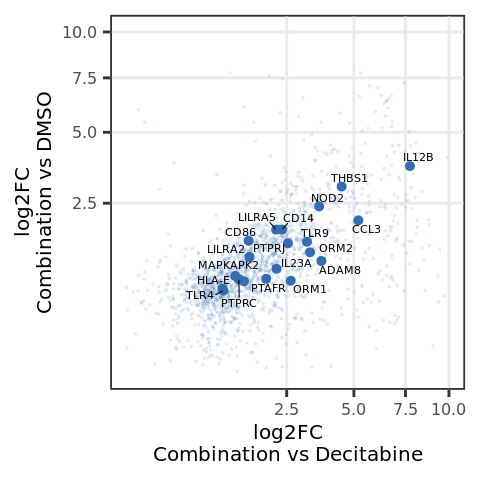

In [29]:
%%R
p + 
    geom_point(
        data          = result_table %>% dplyr::filter(gene_name %in% labels),
        colour='#386cb0',size = 4, alpha = 1, show.legend = FALSE) + 
    geom_text_repel(
        data          = result_table %>% dplyr::filter(gene_name %in% labels),
        # nudge_y       = 36 ,#- subset(dat, mpg > 30)$mpg,
        # segment.size  = 2,
        # segment.color = "grey50",
        # direction     = "x"
    )

# Session Info

In [87]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /data_gilbert/home/aarab/anaconda3/envs/deseq2/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] MASS_7.3-54                 ggthemes_4.2.4             
 [3] gridExtra_2.3               BiocParallel_1.28.0        
 [5] patchwork_1.1.1             DESeq2_1.34.0              
 [7] SummarizedExperiment_1.24.0 MatrixGenerics_1.6.0       
 [9] matrixStats_0.61.

In [88]:
date()

[1] "Tue Oct  4 16:10:36 2022"